In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Concrete.csv', engine = 'python')
df.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## train/ valid/ test 데이터 셋 분할

In [3]:
df_y = df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x = df.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.4, random_state = 1234)

In [4]:
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size = 0.5, random_state = 1234)

In [5]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
valid data X size : (309, 8)
valid data Y size : (309,)
test data X size : (309, 8)
test data Y size : (309,)


# 그래디언트부스팅

## n_estimators Parameter 조정

In [6]:
train_score = [];valid_score= []
para_n_tree = [n_tree * 10 for n_tree in range(1,25)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['ValidScore'] = valid_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidScore
0,10,0.635,0.609
1,20,0.800,0.764
2,30,0.863,0.825
3,40,0.893,0.855
4,50,0.911,0.873
5,60,0.922,0.881
6,70,0.931,0.889
7,80,0.938,0.895
8,90,0.944,0.900
9,100,0.949,0.903


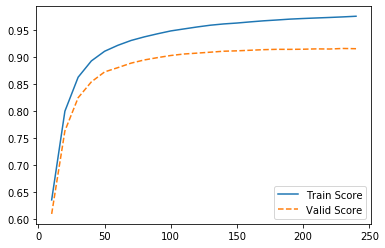

In [7]:
plt.plot(para_n_tree, train_score, linestyle='-', label = "Train Score")
plt.plot(para_n_tree, valid_score, linestyle='--', label = "Valid Score")
plt.legend()

n_estimator의 값이 230일 때 train과 valid의 결정계수 차이가 작으면서 valid 의 값이 가장 높기 때문에 n_estimator을 230으로 지정

## min_samples_leaf Parameter 조정

In [8]:
train_score = [];valid_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 230,
                                 min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidScore'] = valid_score
df_score_leaf

,MinSamplesLeaf,TrainScore,ValidScore
0,1,0.975156,0.916550
1,2,0.975272,0.912162
2,3,0.974748,0.917761
3,4,0.971969,0.913380
4,5,0.970769,0.915627
5,6,0.969741,0.913248
6,7,0.967834,0.918450
7,8,0.965059,0.917520
8,9,0.965953,0.919106
9,10,0.965211,0.922640


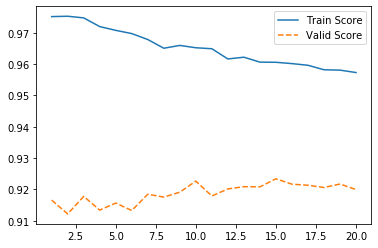

In [9]:
plt.plot(para_leaf, train_score, linestyle='-', label = "Train Score")
plt.plot(para_leaf, valid_score, linestyle='--', label = "Valid Score")
plt.legend()

min_samples_leaf는 15일 때 두 값의 차이가 작으면서 valid값이 크기 때문에 15로 지정

## min_samples_split Parameter 조정

In [10]:
train_score = [];valid_score= []
para_split = [n_split * 1 for n_split in range(30,55)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 230,min_samples_leaf = 15, 
                                 min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidScore'] = valid_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,30,0.961,0.923
1,31,0.962,0.922
2,32,0.960,0.921
3,33,0.960,0.921
4,34,0.961,0.921
5,35,0.960,0.923
6,36,0.960,0.922
7,37,0.960,0.921
8,38,0.960,0.922
9,39,0.959,0.922


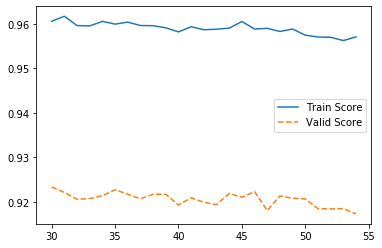

In [11]:
plt.plot(para_split, train_score, linestyle='-', label = "Train Score")
plt.plot(para_split, valid_score, linestyle='--', label = "Valid Score")
plt.legend()

min_samples_split가 35일때 valid값이 가장 높으면서 train값과의 차이가 작으므로 35로 지정

## depth Parameter 조정

In [12]:
train_score = [];valid_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 230, min_samples_leaf = 15, 
                                 min_samples_split = 35, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,Depth,TrainScore,ValidScore
0,1,0.863,0.868
1,2,0.933,0.918
2,3,0.960,0.923
3,4,0.971,0.925
4,5,0.980,0.931
5,6,0.984,0.930
6,7,0.985,0.930
7,8,0.987,0.930
8,9,0.988,0.931
9,10,0.988,0.929


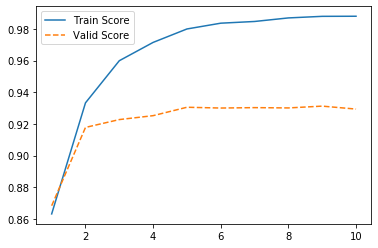

In [13]:
plt.plot(para_depth, train_score, linestyle='-', label = "Train Score")
plt.plot(para_depth, valid_score, linestyle='--', label = "Valid Score")
plt.legend()

depth 의 값이 5일 때 valid값이 가장높으면서 차이가 작기 때문에 5로 지정

In [14]:
train_score = [];valid_score= []
para_lr = [lr*0.01 for lr in range(1,20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 230, min_samples_leaf = 15, 
                                 min_samples_split = 35, max_depth = 5, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x,df_valid_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['LearningRate'] = para_lr
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score
df_score_depth.round(3)

,LearningRate,TrainScore,ValidScore
0,0.01,0.878,0.834
1,0.02,0.933,0.892
2,0.03,0.951,0.909
3,0.04,0.960,0.918
4,0.05,0.965,0.921
5,0.06,0.970,0.921
6,0.07,0.974,0.926
7,0.08,0.976,0.926
8,0.09,0.978,0.929
9,0.10,0.980,0.931


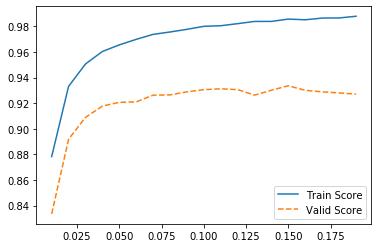

In [15]:
plt.plot(para_lr, train_score, linestyle='-', label = "Train Score")
plt.plot(para_lr, valid_score, linestyle='--', label = "Valid Score")
plt.legend()

learning_rate가 0.15인 경우 valid의 값이 가장 크면서 train값과의 차이가 작기 때문에 0.15로 지정

## 최종 모델 생성

In [16]:
v_feature_name = df_train_x.columns
gb_final = GradientBoostingRegressor(n_estimators = 230, min_samples_leaf = 15, min_samples_split = 35, max_depth = 5, learning_rate = 0.15, random_state= 1234)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on valid set: {:.3f}".format(gb_final.score(df_valid_x, df_valid_y)))

Score on training set: 0.986
Score on valid set: 0.934


## 변수 중요도

In [17]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.331
0,CEMENT,0.285
3,WATER,0.158
4,SUPERPLASTICIZER,0.074
1,BLAST_FURNACE_SLAG,0.073
6,FINE_AGGREGATE,0.045
5,COARSE_AGGREGATE,0.023
2,FLY_ASH,0.011


Text(0, 0.5, '변수')

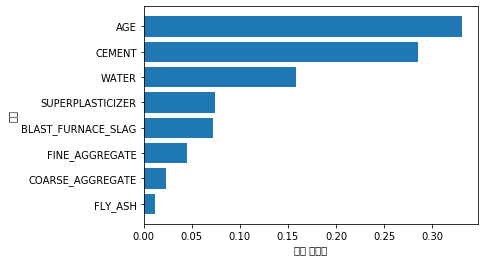

In [33]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

AGE, CEMENT, WATER 변수가 다른 변수들에 비해 콘크리트의 강도에 크게 영향을 미친다.

## test set의 결정계수

In [19]:
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.986
Score on test set: 0.920


test set의 결정 계수 92%로 valid set의 결정계수 93.4%와 큰 차이가 없는 것으로 보아 선택한 파라미터 값들이 적절했다고 생각한다.<br>
이전의 의사결정나무와 랜덤포레스트보다 훨씬 큰 결정계수를 가지고 있기 때문에 콘크리트 강도를 예측하는 데에 세가지 모델 중 가장 적합한 모델이다.

### 그래디언트부스팅 Test set 예측 결과 / MSE /MAE

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

result_y = gb_final.predict(df_test_x)
mean_squared_error(df_test_y,result_y)

22.63381344638646

In [36]:
result_y = gb_final.predict(df_test_x)
mean_absolute_error(df_test_y,result_y)

3.5187626243255727

의사결정나무와 랜덤포레스트보다 훨씬 낮은 MSE와 MAE값을 가지고 있으므로 결정계수와 같이 세가지 모델 중 예측하는 데에 가장 적합하다고 생각한다.